## Solve 1-D wave equation with high order methods

$$\frac{\partial u}{\partial t} = -c\frac{\partial u}{\partial x},$$

where $c$ is the constant wave speed, and $u$ is the scalar being solved.

* Solve on a periodic domain:

```
|-----------------------------|
*     *     *     *     *     O
|-----------------------------|
```

* At "O", there is no grid point. Because the domain is periodic, point "O" overlaps with the first point "*".
* There are 5 grid points shown, and there are 5 grid intervals (between points) shown.


In [1]:
import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

initial mass of y on domain = 0.20000000000000007


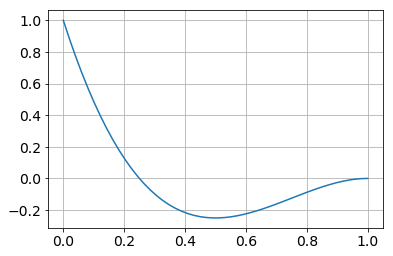

In [4]:
L   = 1.0          # domain length
nx  = 1000          # number of grid points
cfl = 0.1          # approximate to within 1/nx
u0  = 1.0          # base speed
y0  = 0.2          # base y

#------------- set t, x grids

dx = L/nx                           # grid spacing
x  = np.linspace(dx/2, L-dx/2, nx)  # grid points

tend = L/u0 * 0.5
Δt   = cfl*dx/u0
nts  = int(tend/Δt)
Δt   = tend/nts
t    = np.linspace(0.0, tend, nts+1)

#------------- Initial profiles

yinit = y0*np.ones(nx)
y     = yinit.copy()

print(f'initial mass of y on domain = {np.sum(y*dx)}')

#------------- 

def rk4step(rhsf, y):
    
    Δy1 = Δt*rhsf(y,           Δt)
    Δy2 = Δt*rhsf(y + 0.5*Δy1, Δt/2)
    Δy3 = Δt*rhsf(y + 0.5*Δy2, Δt/2)
    Δy4 = Δt*rhsf(y +     Δy3, Δt)
    
    return y + 1/6*(Δy1 + 2*Δy2 + 2*Δy3 + Δy4)
    #return y + Δt*rhsf(y, Δt)       # EE 
    
#------------- 

def fprime(y,a=1,n=2):
    '''used to get derivative of f for entropy condition'''
    return a*(1-y)**n*(1-y-y*(n+1))

ys = np.linspace(0,1)
plt.plot(ys,fprime(ys))
plt.grid()

initial mass of y on domain = 0.20000000000000007
final   mass of y on domain = 0.19999999999999857


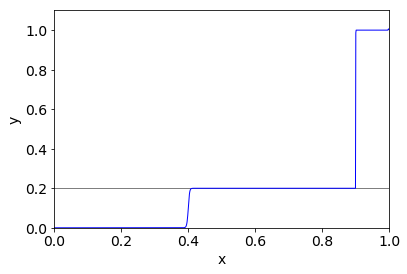

In [2]:
def entropy():
    '''Draws entropy-satisfying jump line to determine the real flux'''
    return 

def godunov_flux(qf,fluxfunc):
    '''returns flux value on an interface'''
    qf = 

def rhsf(y, h):
    
    u = u0*(1.0-y)
    
    f = np.hstack(( 0, (y*u)[:-1] ))
    f[y>=1] = 0.0
    f = np.hstack(( f, 0 ))
    
    return -1.0/dx*(f[1:] - f[:-1])
    
    
#------------- 

for k in range(nts):
    y = rk4step(rhsf, y)
    
#------------- 

print(f'final   mass of y on domain = {np.sum(y*dx)}')

plt.rc('font', size=14)

plt.plot(x,yinit, 'k-', linewidth=0.5)
plt.plot(x,y,     'b-', linewidth=1.0, markersize=2)
plt.ylabel('y')
plt.xlabel('x')
plt.xlim([0,L])
plt.ylim([0,1.1]);